# Week 1 - Part 2
### Pandas Intro

Key points:
* pandas is built on top of numpy
* main classes are: Series and DataFrame
* offers more analysis features:
  - direct support for row/col labels, for convenience
  - more support for statistics, rollup operations
  - some sql-style operations

In [1]:
import pandas as pd
import numpy as np

### Init Data

In [2]:
# init random engine
np.random.seed(1)
# generate a 2D array
arr = np.random.multivariate_normal(mean = [1, 0.5], cov = [[1,0],[0,1]], size=10000)

#### Create DataFrame

In [3]:
df = pd.DataFrame(data = arr, columns=['x1','x2'])

In [ ]:
df.head()

,x1,x2
0,2.624345,-0.111756
1,0.471828,-0.572969
2,1.865408,-1.801539
3,2.744812,-0.261207
4,1.319039,0.250630


# Indexing

In [ ]:
# integer-based like Numpy
df.iloc[0,0]

2.6243453636632417

In [ ]:
# location based on labels
df.loc[0,'x1']

2.6243453636632417

In [ ]:
# all columns
df.iloc[0,:]

In [5]:
# filtering from numpy: applied element-wise to given scope
#   returns row indices and bool results
#   which the DF accepts as filtering input
#df['x1']>2
df[df['x1']>2]

,x1,x2
0,2.624345,-0.111756
3,2.744812,-0.261207
5,2.462108,-1.560141
7,2.133769,-0.599891
19,2.659802,1.242044
...,...,...
9976,2.027737,1.899711
9983,2.503808,-0.790159
9985,2.525331,0.271233
9992,2.872532,1.784916


#Sorting

In [ ]:
# note the index value looks strange afterwards - they do not get updated
df.sort_values(by='x1')

,x1,x2
4775,-2.656440,-0.743009
7605,-2.435926,1.089613
3704,-2.294858,0.590840
5185,-2.282079,-0.168041
2960,-2.260615,1.090706
...,...,...
5323,4.560613,0.445475
4618,4.560873,0.270304
4363,4.613277,1.398949
7472,4.834381,1.537048


In [ ]:
# we can reset the index so it restarts from zero
df.sort_values(by='x1').reset_index(drop=True)

,x1,x2
0,-2.656440,-0.743009
1,-2.435926,1.089613
2,-2.294858,0.590840
3,-2.282079,-0.168041
4,-2.260615,1.090706
...,...,...
9995,4.560613,0.445475
9996,4.560873,0.270304
9997,4.613277,1.398949
9998,4.834381,1.537048


In [ ]:
# Sort by mult cols (primary/secondary)
df.sort_values(by=['x1','x2'], ascending=[True,False]).reset_index(drop=True)

,x1,x2
0,-2.656440,-0.743009
1,-2.435926,1.089613
2,-2.294858,0.590840
3,-2.282079,-0.168041
4,-2.260615,1.090706
...,...,...
9995,4.560613,0.445475
9996,4.560873,0.270304
9997,4.613277,1.398949
9998,4.834381,1.537048


### Customize the index

In [6]:
# handy way to create a Range of dates
date_index = pd.date_range(start="2000-01-01", periods=10000, freq='D')

In [7]:
# reassign the index!
df.index = date_index

In [8]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2027-05-09', '2027-05-10', '2027-05-11', '2027-05-12',
               '2027-05-13', '2027-05-14', '2027-05-15', '2027-05-16',
               '2027-05-17', '2027-05-18'],
              dtype='datetime64[ns]', length=10000, freq='D')

In [10]:
# note: can no longer index as df.loc[0],  it is not an index!
df.loc[pd.to_datetime("2000-01-01"), 'x1']
# can still use iloc 


2.6243453636632417

In [ ]:
# good to understand what type you're working with
type(pd.to_datetime("2000-01-01"))

pandas._libs.tslibs.timestamps.Timestamp

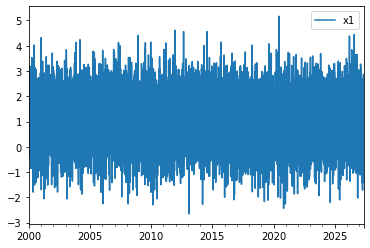

In [11]:
df.plot(y='x1',kind='line')

In [ ]:
df.head()

,x1,x2
2000-01-01,2.624345,-0.111756
2000-01-02,0.471828,-0.572969
2000-01-03,1.865408,-1.801539
2000-01-04,2.744812,-0.261207
2000-01-05,1.319039,0.250630


In [12]:
# create col called lagged x1
#  this takes x1 and inserts as a new col in the next row down
#  can also shift up w/ periods = -1
#df['x1'].shift(periods=1)
df['x1_lagged'] = df['x1'].shift()

In [ ]:
df.head()

,x1,x2,x1_lagged,first_diff
2000-01-01,2.624345,-0.111756,NaN,NaN
2000-01-02,0.471828,-0.572969,2.624345,-2.152517
2000-01-03,1.865408,-1.801539,0.471828,1.393579
2000-01-04,2.744812,-0.261207,1.865408,0.879404
2000-01-05,1.319039,0.250630,2.744812,-1.425773


In [ ]:
# basically diffs x1 and x1_lagged, 
#    b/c the default is to diff with element in previous row
df['first_diff'] = df['x1'].diff()

In [ ]:
df.head()

,x1,x2,x1_lagged,first_diff
2000-01-01,2.624345,-0.111756,NaN,NaN
2000-01-02,0.471828,-0.572969,2.624345,-2.152517
2000-01-03,1.865408,-1.801539,0.471828,1.393579
2000-01-04,2.744812,-0.261207,1.865408,0.879404
2000-01-05,1.319039,0.250630,2.744812,-1.425773


In [ ]:
# rolling average - the window of 3 rows moves forward as it calculates the mean
df.rolling(window=3, min_periods=3).mean()

,x1,x2,x1_lagged,first_diff
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,1.653860,-0.828755,NaN,NaN
2000-01-04,1.694016,-0.878571,1.653860,0.040155
2000-01-05,1.976419,-0.604039,1.694016,0.282404
...,...,...,...,...
2027-05-14,1.010864,0.082252,1.507053,-0.496189
2027-05-15,0.162818,-0.432635,1.010864,-0.848045
2027-05-16,0.789638,-0.561308,0.162818,0.626819
2027-05-17,0.922388,0.514429,0.789638,0.132751


In [ ]:
# day to day avg of the 3 cols; can use to smooth the data
df['moving_average_3d'] = df['x1'].rolling(window=3, min_periods=3).mean()

In [ ]:
df.head()

,x1,x2,x1_lagged,first_diff,moving_average_3d
2000-01-01,2.624345,-0.111756,NaN,NaN,NaN
2000-01-02,0.471828,-0.572969,2.624345,-2.152517,NaN
2000-01-03,1.865408,-1.801539,0.471828,1.393579,1.653860
2000-01-04,2.744812,-0.261207,1.865408,0.879404,1.694016
2000-01-05,1.319039,0.250630,2.744812,-1.425773,1.976419


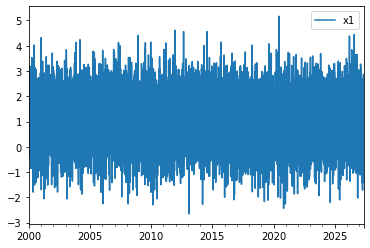

In [ ]:
df.plot(y='x1',kind='line')

### Binning
This can smooth the data out as well. Can help to clarify and gain intuion.

In [ ]:
df.head()

,x1,x2,x1_lagged,first_diff,moving_average_3d
2000-01-01,2.624345,-0.111756,NaN,NaN,NaN
2000-01-02,0.471828,-0.572969,2.624345,-2.152517,NaN
2000-01-03,1.865408,-1.801539,0.471828,1.393579,1.653860
2000-01-04,2.744812,-0.261207,1.865408,0.879404,1.694016
2000-01-05,1.319039,0.250630,2.744812,-1.425773,1.976419


In [ ]:
# adding .T  transposes the matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,10000.0,1.017643,1.005364,-2.656440,0.333021,1.030006,1.695191,5.168118
x2,10000.0,0.501565,0.994619,-2.951403,-0.165860,0.495291,1.166435,4.526849
x1_lagged,9999.0,1.017557,1.005377,-2.656440,0.332996,1.030002,1.694740,5.168118
first_diff,9999.0,-0.000074,1.422447,-5.330868,-0.967771,0.001245,0.959849,4.993232
moving_average_3d,9998.0,1.017471,0.581202,-1.061238,0.628990,1.020452,1.415274,3.562376


In [ ]:
# binning x2 into buckets 
#  - array defines the buckets
#  - optionally can re-label the defined buckets
#  - here we add the defined bin as just another attribute of the row
df['x2_bin'] = pd.cut(df['x2'], [-np.inf, -1, 0, 1, np.inf], labels=[i for i in range(4)])

In [ ]:
# can also use quartiles for the cuts
#see qcut

In [ ]:
# counts per bin
#df.groupby('x2_bin').describe()
df.groupby('x2_bin').apply(len)

x2_bin
0     677
1    2386
2    3864
3    3073
dtype: int64

In [ ]:
df['x2_bin'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [ ]:
df.head()

,x1,x2,x1_lagged,first_diff,moving_average_3d,x2_bin
2000-01-01,2.624345,-0.111756,NaN,NaN,NaN,1
2000-01-02,0.471828,-0.572969,2.624345,-2.152517,NaN,1
2000-01-03,1.865408,-1.801539,0.471828,1.393579,1.653860,0
2000-01-04,2.744812,-0.261207,1.865408,0.879404,1.694016,1
2000-01-05,1.319039,0.250630,2.744812,-1.425773,1.976419,2


In [ ]:
# Here's a rookie mistake:

# define 3 filtered subsets
df_a,df_b,df_c = df[df['x2_bin']==0], df[df['x2_bin']==1], df[df['x2_bin']==2]

In [ ]:
# what is wrong w/ this?
for df in [df_a,df_b,df_c]:
  df = df[df['x1']>0]

In [ ]:
# has reference issues - the df will not get re-assigned
# try doing smthg more like
df_a,df_b,df_c = [df[df['x1']>0] for df in [df_a,df_b,df_c]]